<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/stats/paphos_daily_weather_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.visualcrossing.com/weather/weather-data-services#

In [ ]:
from datetime import datetime, timedelta

# Get today's date
today = datetime.now() - timedelta(days=1)

# Calculate the date 14 days ago
date_14_days_ago = today - timedelta(days=14)

# Format the dates in YYYY-MM-DD format
today_str = today.strftime('%Y-%m-%d')
date_14_days_ago_str = date_14_days_ago.strftime('%Y-%m-%d')


date1=date_14_days_ago_str
date2=today_str

print ("from ", date1, " to ", date2)



paphos="34.68,32.61"

sc="33.46242581990894,-79.13561525981794"

#prompt=input("1 for Pahos 2 for Myrtle Beach ")

prompt = "1"

if prompt == "1":
  location=paphos
  filestr = "paphos"
  unitgroup = "metric"
else:
  location=sc
  filestr = "sc"
  unitgroup = "us"


#apikey = input("API Key")

apikey="ET2UEWPH7KFHT289DDMPTQJFV"


from  2024-09-26  to  2024-10-10


In [ ]:

url='https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{0}/{1}/{2}?key={3}&include=hours&contentType=csv&unitGroup={4}'.format(location,date1,date2,apikey,unitgroup)

import requests

headers = {'Accept': 'text/csv'}


# Send the GET request
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Save the content to a CSV file
    with open(filestr + ".csv", 'wb') as file:
        file.write(response.content)
    print("CSV file downloaded and saved as ", filestr + ".csv")
else:
    print(f"Failed to retrieve the CSV file. Status code: {response.status_code}")

import pandas as pd



CSV file downloaded and saved as  paphos.csv


In [ ]:
import pandas as pd

df=pd.read_csv(filestr + ".csv",usecols=['datetime','temp','feelslike','humidity'],parse_dates=['datetime'])


df.set_index('datetime', inplace=True)
df=df.between_time('08:00', '18:00')

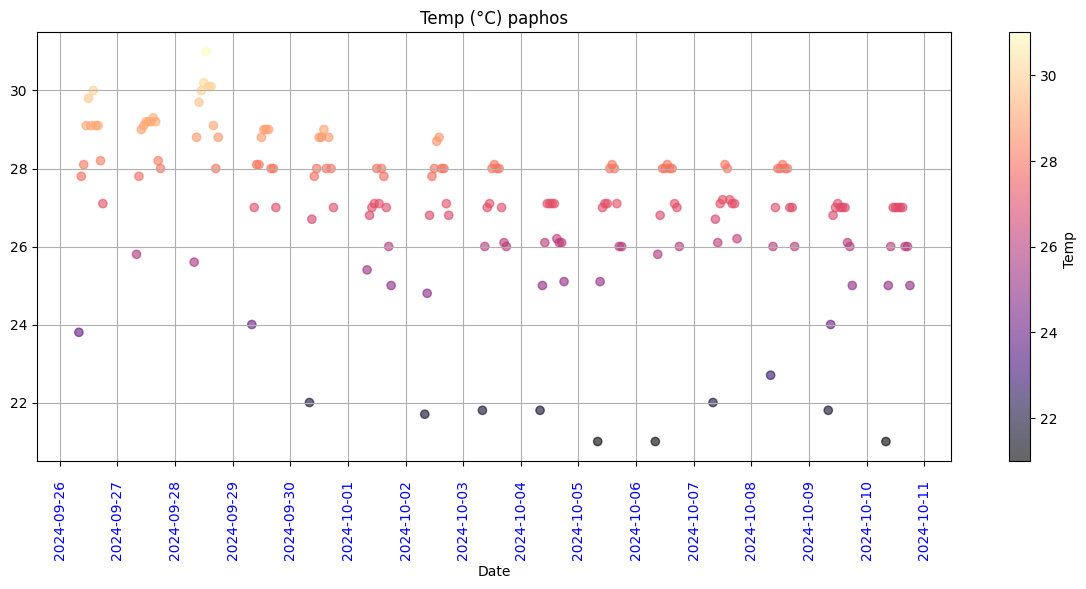

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt


# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

#plt.cm.hot_r

# Scatter plot with colormap
sc = ax.scatter(df.index, df['temp'], c=df['temp'],cmap="magma",  alpha=0.6)

# Adding color bar
cbar = plt.colorbar(sc)
cbar.set_label('Temp ')

# Set labels
ax.set_xlabel('Date')

plt.xticks(rotation=90)

# Set major and minor ticks format
ax.xaxis.set_major_locator(mdates.DayLocator())
#ax.xaxis.set_minor_locator(mdates.HourLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H'))

# Rotate x-ticks
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, color='blue', ha='center', va='top', position=(0, -0.02))
#plt.setp(ax.xaxis.get_minorticklabels(), rotation=90, color='purple', ha='center', va='bottom')

# Move minor ticks (hours) below x-axis
ax.tick_params(axis='x', which='minor', pad=15)

#ax.tick_params(axis='x', which='major', pad=15)

#plt.ylim(80,95)

# Adding a title
if unitgroup == "metric":
  plt.title('Temp (°C) ' + filestr)
else:
  plt.title('Temp (°F) ' + filestr)

# Adding legends
#plt.legend()

plt.grid()

# Displaying the chart
plt.tight_layout()
plt.show()

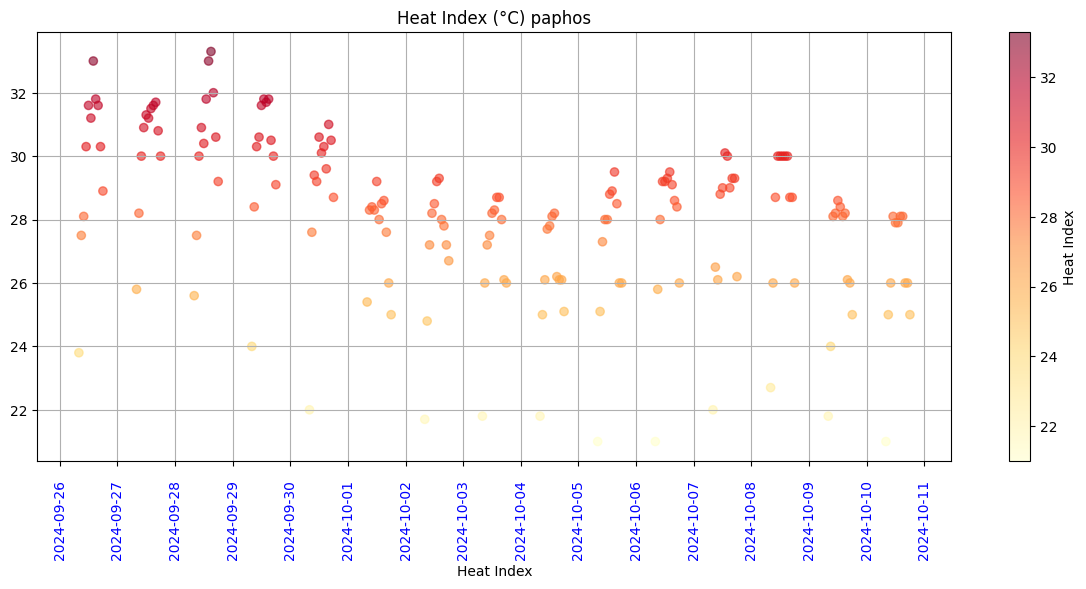

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Your data preparation code here (e.g., df creation, filestr, unitgroup)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot with colormap
sc = ax.scatter(df.index, df['feelslike'], c=df['feelslike'], cmap='YlOrRd', alpha=0.6)

# Adding color bar
cbar = plt.colorbar(sc)
cbar.set_label('Heat Index')

# Set labels
ax.set_xlabel('Heat Index')
plt.xticks(rotation=90)


ax.xaxis.set_major_locator(mdates.DayLocator())

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))



plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, color='blue', ha='center', va='top', position=(0, -0.02))


# Move minor ticks (hours) below x-axis
ax.tick_params(axis='x', which='minor', pad=15)
# ax.tick_params(axis='x', which='major', pad=15)

# Adding a title
if unitgroup == "metric":
    plt.title('Heat Index (°C) ' + filestr)
else:
    plt.title('Heat Index (°F) ' + filestr)

plt.grid()

# Displaying the chart
plt.tight_layout()
plt.show()


In [ ]:
# -*- coding: utf-8 -*-
"""waves.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/stats/waves.ipynb



"""


from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Source path of your file (assuming it's in the current working directory)
source_path = filestr + ".csv"

# Destination path in your Google Drive
#destination_path = '/content/drive/My Drive/' + filestr + "." + today_str

destination_path = '/content/drive/My Drive/weather/' + filestr +  today_str + ".csv"

# Copy the file
shutil.copy(source_path, destination_path)

print(f'File saved to {destination_path}')

from datetime import datetime, timedelta

# Calculate the date for 'yesterday' in UTC
yesterday = datetime.utcnow() - timedelta(days=1)
yesterday_str = yesterday.strftime('%Y-%m-%dT%H:%M:%SZ')

# Calculate the date for '10 days before yesterday' in UTC
tendays = yesterday - timedelta(days=10)
tendays_str = tendays.strftime('%Y-%m-%dT%H:%M:%SZ')

# Calculate the date for '1 year before yesterday' in UTC
lastyearyesterday = yesterday - timedelta(days=365)
lastyearyesterday_str = lastyearyesterday.strftime('%Y-%m-%dT%H:%M:%SZ')

# Calculate the date for '10 days before 1 year before yesterday' in UTC
lastyeartendays = lastyearyesterday - timedelta(days=10)
lastyeartendays_str = lastyeartendays.strftime('%Y-%m-%dT%H:%M:%SZ')

# Print the results
print("Yesterday (UTC):", yesterday_str)
print("10 days before Yesterday (UTC):", tendays_str)
print("1 year before Yesterday (UTC):", lastyearyesterday_str)
print("10 days before 1 year before Yesterday (UTC):", lastyeartendays_str)

apikey="b74de4f2-5352-11ef-aa85-0242ac130004-b74de5d8-5352-11ef-aa85-0242ac130004"




# https://dashboard.stormglass.io/

# https://docs.stormglass.io/?utm_medium=email&_hsenc=p2ANqtz-9NtG7HIa1BhxP3kX2NPRJLRhL3kaXEfAvVmC9k-p8qYUe0KFQrPtaz34Ucy8W71I9wyEopdsQsCGZxj-QaXWlZug1hHQ&_hsmi=290896009&utm_content=290896009&utm_source=hs_automation#/weather


import requests

params='currentDirection,currentSpeed,gust,waterTemperature,waveDirection,waveHeight,wavePeriod,windWaveDirection,windWaveHeight,windWavePeriod,windDirection,swellDirection,swellHeight,swellPeriod'


response = requests.get(
  'https://api.stormglass.io/v2/weather/point',
  params={
    'lat': 34.68,
    'lng': 32.61,
    'start' : tendays_str,
    'end' : yesterday_str,
    'params': params
  },
  headers={
    'Authorization': apikey
  }
)

# Do something with response data.
json_data = response.json()

json_data



import requests

params='currentDirection,currentSpeed,gust,waterTemperature,waveDirection,waveHeight,wavePeriod,windWaveDirection,windWaveHeight,windWavePeriod,windDirection,swellDirection,swellHeight,swellPeriod'


response = requests.get(
  'https://api.stormglass.io/v2/weather/point',
  params={
    'lat': 34.68,
    'lng': 32.61,
    'start' : lastyeartendays_str,
    'end' : lastyearyesterday_str,
    'params': params
  },
  headers={
    'Authorization': apikey
  }
)

# Do something with response data.
lastYearData = response.json()

lastYearData

import json
#from google.colab import drive
#import shutil

# Mount Google Drive
#drive.mount('/content/drive')

# Writing JSON data to a file
with open(yesterday_str + ".waves.json", 'w', encoding='utf-8') as f:
    json.dump(json_data, f, ensure_ascii=False, indent=4)

# Source path of your file (assuming it's in the current working directory)
now_source_path = yesterday_str + ".waves.json"

now_destination_path = '/content/drive/My Drive/weather/' + yesterday_str + ".waves.json"

# Copy the file
shutil.copy(now_source_path, now_destination_path)

print(f'File saved to {now_destination_path}')

# Writing JSON data to a file
with open(lastyearyesterday_str + ".waves.json", 'w', encoding='utf-8') as f:
    json.dump(lastYearData, f, ensure_ascii=False, indent=4)

# Source path of your file (assuming it's in the current working directory)
now_source_path = lastyearyesterday_str + ".waves.json"

now_destination_path = '/content/drive/My Drive/weather/' + lastyearyesterday_str + ".waves.json"

# Copy the file
shutil.copy(now_source_path, now_destination_path)

print(f'File saved to {now_destination_path}')

Mounted at /content/drive
File saved to /content/drive/My Drive/weather/paphos2024-10-10.csv
Yesterday (UTC): 2024-10-10T04:30:05Z
10 days before Yesterday (UTC): 2024-09-30T04:30:05Z
1 year before Yesterday (UTC): 2023-10-11T04:30:05Z
10 days before 1 year before Yesterday (UTC): 2023-10-01T04:30:05Z
File saved to /content/drive/My Drive/weather/2024-10-10T04:30:05Z.waves.json
File saved to /content/drive/My Drive/weather/2023-10-11T04:30:05Z.waves.json
